In [1]:
import pandas as pd
import numpy as np

from PIL import Image, ImageFilter   # ImageFilter for using filter() function

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Opening the image 
# (R prefixed to string in order to deal with '\' in paths)
image = Image.open("soy.jpg")
image1= Image.open('rice.jpg')
  
# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument /adjust radius value to change the blurness
image = image.filter(ImageFilter.GaussianBlur(radius=0))
image1 = image1.filter(ImageFilter.GaussianBlur(radius=5))

image.save('output1.png')
image1.save('output2.png')

# Displaying the image
image.show()  # not working in colab
# image  or # display(image)  # both working
 

### Read csv file

## How to resolve a UnicodeDecodeError problem

https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/

credit : PAUL MOONEY (kaggle)

In [5]:
# import chardet python character encoding detector
import chardet
with open('soybean.csv', 'rb') as rawdf:
    result = chardet.detect(rawdf.read())
result

{'encoding': 'SHIFT_JIS',
 'confidence': 0.47417840375586856,
 'language': 'Japanese'}

In [3]:
# df = pd.read_csv('soybean.csv',encoding= 'unicode_escape')
df = pd.read_csv('soybean.csv',encoding = "SHIFT_JIS")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   統計名：                 67 non-null     object
 1   食料需給表 確報 令和２年度食料需給表  67 non-null     object
 2   Unnamed: 2           64 non-null     object
 3   Unnamed: 3           63 non-null     object
 4   Unnamed: 4           63 non-null     object
 5   Unnamed: 5           63 non-null     object
 6   Unnamed: 6           63 non-null     object
 7   Unnamed: 7           63 non-null     object
 8   Unnamed: 8           63 non-null     object
 9   Unnamed: 9           63 non-null     object
 10  Unnamed: 10          63 non-null     object
 11  Unnamed: 11          63 non-null     object
 12  Unnamed: 12          63 non-null     object
 13  Unnamed: 13          63 non-null     object
 14  Unnamed: 14          63 non-null     object
 15  Unnamed: 15          63 non-null     object
 16  Unnamed: 1

,統計名：,食料需給表 確報 令和２年度食料需給表,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,表番号：,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,表題：,[品目別累年表] 品目別累年表,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,実施年月：,2020年度,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,***,計数がない場合,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,豆類／大豆,2016年度,238,"3,131",0,-55,"3,424",106,7,"2,439",...,100,809,6.4,17.5,74.5,5.9,3.6,426.7,33.6,20.6
68,豆類／大豆,2017年度,253,"3,218",0,-102,"3,573",81,8,"2,599",...,100,821,6.5,17.8,75.7,6,3.7,426.7,33.6,20.6
69,豆類／大豆,2018年度,211,"3,236",0,-120,"3,567",83,8,"2,562",...,100,844,6.7,18.3,78,6.1,3.8,426.7,33.6,20.6
70,豆類／大豆,2019年度,218,"3,359",0,-106,"3,683",84,8,"2,663",...,100,858,6.8,18.6,73.8,6.2,4,397.2,33.3,21.4


### Data cleaning

In [7]:
# convert row as new header
new_header = df.iloc[10]
df_clean = pd.DataFrame(df.values[11:],columns=new_header) 
df_clean['年度'] = df_clean['年度'].loc[:].str.strip('年度')
 
df_clean.columns
df_clean

10,品目,年度,国内生産量【1000トン】,外国貿易_輸入量【1000トン】,外国貿易_輸出量【1000トン】,在庫の増減量【1000トン】,国内消費仕向量【1000トン】,国内消費仕向量の内訳_飼料用【1000トン】,国内消費仕向量の内訳_種子用【1000トン】,国内消費仕向量の内訳_加工用【1000トン】,...,国内消費仕向量の内訳_歩留り【％】,国内消費仕向量の内訳_純食料【1000トン】,１人当たり供給純食料_１年当たり数量【kg】,１人当たり供給純食料_１日当たり_数量【ｇ】,１人当たり供給純食料_１日当たり_熱量【kcal】,１人当たり供給純食料_１日当たり_たんぱく質【ｇ】,１人当たり供給純食料_１日当たり_脂質【ｇ】,純食料100g中の栄養成分量_熱量【kcal】,純食料100g中の栄養成分量_たんぱく質【ｇ】,純食料100g中の栄養成分量_脂質【ｇ】
0,豆類／大豆,1960,418,"1,081",0,-18,"1,517",0,16,974,...,100,519,5.6,15.2,59.7,5.2,2.7,392,34.3,17.5
1,豆類／大豆,1961,387,"1,176",0,-5,"1,568",0,12,"1,021",...,100,527,5.6,15.3,60,5.3,2.7,392,34.3,17.5
2,豆類／大豆,1962,336,"1,284",0,19,"1,601",0,11,"1,092",...,100,491,5.2,14.1,55.4,4.8,2.5,392,34.3,17.5
3,豆類／大豆,1963,318,"1,617",0,56,"1,879",0,10,"1,376",...,100,486,5.1,13.8,54.1,4.7,2.4,392,34.3,17.5
4,豆類／大豆,1964,240,"1,607",0,-34,"1,881",0,11,"1,401",...,100,462,4.8,13,51.1,4.5,2.3,392,34.3,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,豆類／大豆,2016,238,"3,131",0,-55,"3,424",106,7,"2,439",...,100,809,6.4,17.5,74.5,5.9,3.6,426.7,33.6,20.6
57,豆類／大豆,2017,253,"3,218",0,-102,"3,573",81,8,"2,599",...,100,821,6.5,17.8,75.7,6,3.7,426.7,33.6,20.6
58,豆類／大豆,2018,211,"3,236",0,-120,"3,567",83,8,"2,562",...,100,844,6.7,18.3,78,6.1,3.8,426.7,33.6,20.6
59,豆類／大豆,2019,218,"3,359",0,-106,"3,683",84,8,"2,663",...,100,858,6.8,18.6,73.8,6.2,4,397.2,33.3,21.4


In [15]:
# convert strings to float type
df_clean = df_clean.replace('-','0',regex=True)
df_clean = df_clean.replace(',','',regex=True)
for x in df_clean.columns[1:]:
  df_clean[x] =df_clean[x].astype('float')
 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   品目                          61 non-null     object 
 1   年度                          61 non-null     float64
 2   国内生産量【1000トン】               61 non-null     float64
 3   外国貿易_輸入量【1000トン】            61 non-null     float64
 4   外国貿易_輸出量【1000トン】            61 non-null     float64
 5   在庫の増減量【1000トン】              61 non-null     float64
 6   国内消費仕向量【1000トン】             61 non-null     float64
 7   国内消費仕向量の内訳_飼料用【1000トン】      61 non-null     float64
 8   国内消費仕向量の内訳_種子用【1000トン】      61 non-null     float64
 9   国内消費仕向量の内訳_加工用【1000トン】      61 non-null     float64
 10  国内消費仕向量の内訳_純旅客用【1000トン】     61 non-null     float64
 11  国内消費仕向量の内訳_減耗量【1000トン】      61 non-null     float64
 12  国内消費仕向量の内訳_粗食料_総数【1000トン】   61 non-null     float64
 13  国内消費仕向量の内訳_粗食料_１人１年当たり【kg】  61 non-nu

In [ ]:
fig = px.bar(df_clean, x='年度',y='国内生産量【1000トン】')
# fig.update_yaxes(type='log')
fig.show()

In [23]:
df_new=pd.melt(df_clean, id_vars=['年度'], value_vars=['国内生産量【1000トン】', '外国貿易_輸入量【1000トン】'])
df_new.info()
 
df_new.rename(columns={'年度': 'Year', 10: 'items'}, inplace=True)
# df_new = df_new.rename(columns={'年度': 'Year', 10: 'items'})  # or version2
df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年度      122 non-null    float64
 1   10      122 non-null    object 
 2   value   122 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


,Year,items,value
0,1960.0,国内生産量【1000トン】,418.0
1,1961.0,国内生産量【1000トン】,387.0
2,1962.0,国内生産量【1000トン】,336.0
3,1963.0,国内生産量【1000トン】,318.0
4,1964.0,国内生産量【1000トン】,240.0
...,...,...,...
117,2016.0,外国貿易_輸入量【1000トン】,3131.0
118,2017.0,外国貿易_輸入量【1000トン】,3218.0
119,2018.0,外国貿易_輸入量【1000トン】,3236.0
120,2019.0,外国貿易_輸入量【1000トン】,3359.0


In [24]:
fig=px.bar(df_new,x='Year',y='value',color='items')
fig.show()

In [27]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_clean['年度'],y=df_clean['国内消費仕向量【1000トン】']
    ))

fig.add_trace(
    go.Bar(
       x=df_new['Year'],y=df_new['value'],base=df_new['items'] 
    ))

fig.show()

https://stackoverflow.com/questions/70563166/stacked-barplot-in-plotly


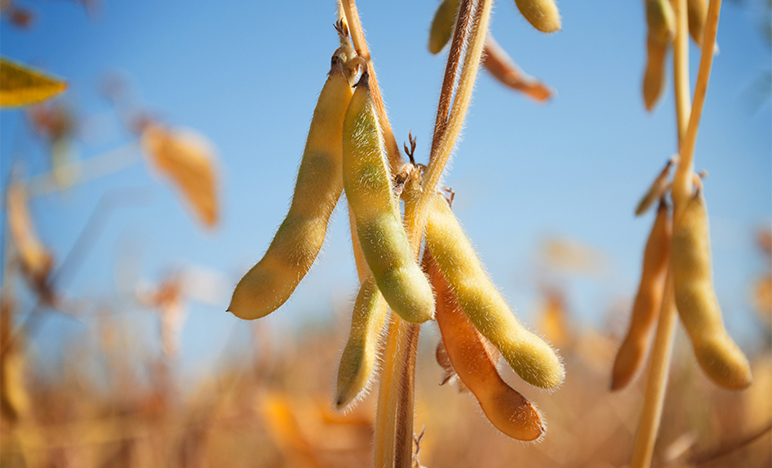

In [28]:
from plotly import graph_objects as go

# Open the image from local path
im = Image.open('output1.png')
 
fig = go.Figure(
    data=[
        go.Scatter(
            name="Local consumption",
            x=df_clean["年度"],
            y=df_clean["国内消費仕向量【1000トン】"],
            # offsetgroup=0,
            
        ),
        go.Bar(
            name="Local production",
            x=df_clean["年度"],
            y=df_clean["国内生産量【1000トン】"],
            offsetgroup=1,
             
          
        ),
        go.Bar(
            name="Imports",
            x=df_clean["年度"],
            y=df_clean["外国貿易_輸入量【1000トン】"],
            offsetgroup=1,
            base=df_clean["国内生産量【1000トン】"],
            
        ),
        go.Bar(
            name="Exports",
            x=df_clean["年度"],
            y=df_clean["外国貿易_輸出量【1000トン】"]*(-1),
            offsetgroup=1,
            # base=df_clean["国内生産量【1000トン】"],
            
        ),

    ],
    layout=go.Layout(
        title="Soy beans supply and demand in Japan",
        yaxis_title="volume"
    )
)
fig.update_layout(font_size=20,title={'text':'Japan soybean production and consumption(in thousand metric tons)','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},yaxis={'categoryorder':'total ascending',},paper_bgcolor='rgb(248,248,255)',
    plot_bgcolor='rgb(248,248,255)')

## Add data source
fig.add_annotation(text="Source: e-Stat https://www.e-stat.go.jp",
                  xref="paper", yref="paper",
                  x=-0.05, y=-0.2, showarrow=False,font=dict(family='Arial', size=12,
                                      color='rgb(150, 150, 150)'))

## Hide legend 
fig.update(layout_showlegend=False)

## Add image as background image
fig.add_layout_image(
    dict(source= im,
            xref="paper",
            yref="paper",
            x=-0.5,
            y=2,
            sizex=5,
            sizey=5,
            # sizing="stretch",
            opacity=0.2,
         #layer ='below'
            )
)
 
## Add text annotation
fig.add_annotation(xref='paper',yref='paper',x=0.4, y=1.1,
            text="Local consumption",
            font=dict(family='Arial',size=16,
            color='rgb(0,0,250)'),
            showarrow=False,
            arrowhead=3,arrowsize=2,arrowwidth=1,ax=50,ay=-50,arrowcolor='blue')

## Add text annotation
fig.add_annotation(xref='paper',yref='paper',x=0.5, y=1.1,
            text="Import",
            font=dict(family='Arial',size=16,
            color='rgb(0,200,100)'),
            showarrow=False,
            arrowhead=2,arrowsize=2,arrowwidth=1,ax=20,ay=-50,arrowcolor='rgb(0,200,100)')

## Add text annotation
fig.add_annotation(xref='paper',yref='paper',x=0.62, y=1.1,
            text="local production",
            font=dict(family='Arial',size=16,
            color='rgb(250,0,0)'),
            showarrow=False,
            arrowhead=2,arrowsize=2,arrowwidth=1,ax=20,ay=-50,arrowcolor='rgb(200,0,100)')

# fig.update_yaxes(type='log')

fig.show()

In [ ]:
# !pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# pip install --upgrade xlrd
# Open excel file
df_new = pd.read_excel('f002c-001-001-001-000.xls')
df_new.head(20)

WARNING *** file size (65032) not 512 + multiple of sector size (512)


,作物統計,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,収穫量累年統計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,水稲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,全国,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,年次,作付面積,10a当たり平年収量,平年収量,8月15日現在,NaN,9月1日現在,9月10日現在,9月15日現在,9月25日現在,10月1日現在,NaN,NaN,10月15日現在,NaN,NaN,収穫期,NaN,NaN
4,NaN,NaN,NaN,NaN,作柄の良否(早場地帯）,作況指数,作況指数,作況指数,作況指数,作況指数,10a当たり収量,作況指数,予想収穫量,10a当たり収量,作況指数,予想収穫量,10a当たり収量,作況指数,収穫量
5,NaN,ha,kg,t,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,t,kg,NaN,t,kg,NaN,t
6,明.16(1883),2565000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,178,…,4566000
7,明.17(1884),2551000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,158,…,4041000
8,明.18(1885),2552000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,198,…,5063000
9,明.19(1886),2576000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,216,…,5557000


In [ ]:
df_new.head(20)

,作物統計,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,収穫量累年統計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,水稲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,全国,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,年次,作付面積,10a当たり平年収量,平年収量,8月15日現在,NaN,9月1日現在,9月10日現在,9月15日現在,9月25日現在,10月1日現在,NaN,NaN,10月15日現在,NaN,NaN,収穫期,NaN,NaN
4,NaN,NaN,NaN,NaN,作柄の良否(早場地帯）,作況指数,作況指数,作況指数,作況指数,作況指数,10a当たり収量,作況指数,予想収穫量,10a当たり収量,作況指数,予想収穫量,10a当たり収量,作況指数,収穫量
5,NaN,ha,kg,t,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,t,kg,NaN,t,kg,NaN,t
6,明.16(1883),2565000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,178,…,4566000
7,明.17(1884),2551000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,158,…,4041000
8,明.18(1885),2552000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,198,…,5063000
9,明.19(1886),2576000,…,…,…,…,…,…,…,…,…,…,…,…,…,…,216,…,5557000


https://pythondata.com/visualizing-data-overlaying-charts/

In [ ]:
# Select a subset from a dataframe
df_rice = df_new[['作物統計','Unnamed: 1','Unnamed: 18']]
df_rice.head(10)

,作物統計,Unnamed: 1,Unnamed: 18
0,収穫量累年統計,NaN,NaN
1,水稲,NaN,NaN
2,全国,NaN,NaN
3,年次,作付面積,NaN
4,NaN,NaN,収穫量
5,NaN,ha,t
6,明.16(1883),2565000,4566000
7,明.17(1884),2551000,4041000
8,明.18(1885),2552000,5063000
9,明.19(1886),2576000,5557000


https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html

In [ ]:
df_rice_new=df_rice.iloc[6:].rename({'作物統計':'Year','Unnamed: 1':'plant area(ha)','Unnamed: 18':'Harvest quantity(t)'},axis=1)
df_rice_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 6 to 143
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 138 non-null    object
 1   plant area(ha)       138 non-null    object
 2   Harvest quantity(t)  138 non-null    object
dtypes: object(3)
memory usage: 3.4+ KB


In [ ]:
# convert strings to float type
# df_clean = df_clean.replace('-','0',regex=True)
# df_clean = df_clean.replace(',','',regex=True)
for x in df_rice_new.columns[1:]:
  df_rice_new[x] =df_rice_new[x].astype('float')
 
df_rice_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 6 to 143
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 138 non-null    object 
 1   plant area(ha)       138 non-null    float64
 2   Harvest quantity(t)  138 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


https://plotly.com/python/bar-charts/

https://plotly.com/python/axes/

https://www.geeksforgeeks.org/python-plotly-how-to-add-multiple-y-axes/

https://www.geeksforgeeks.org/python-pil-gaussianblur-method/


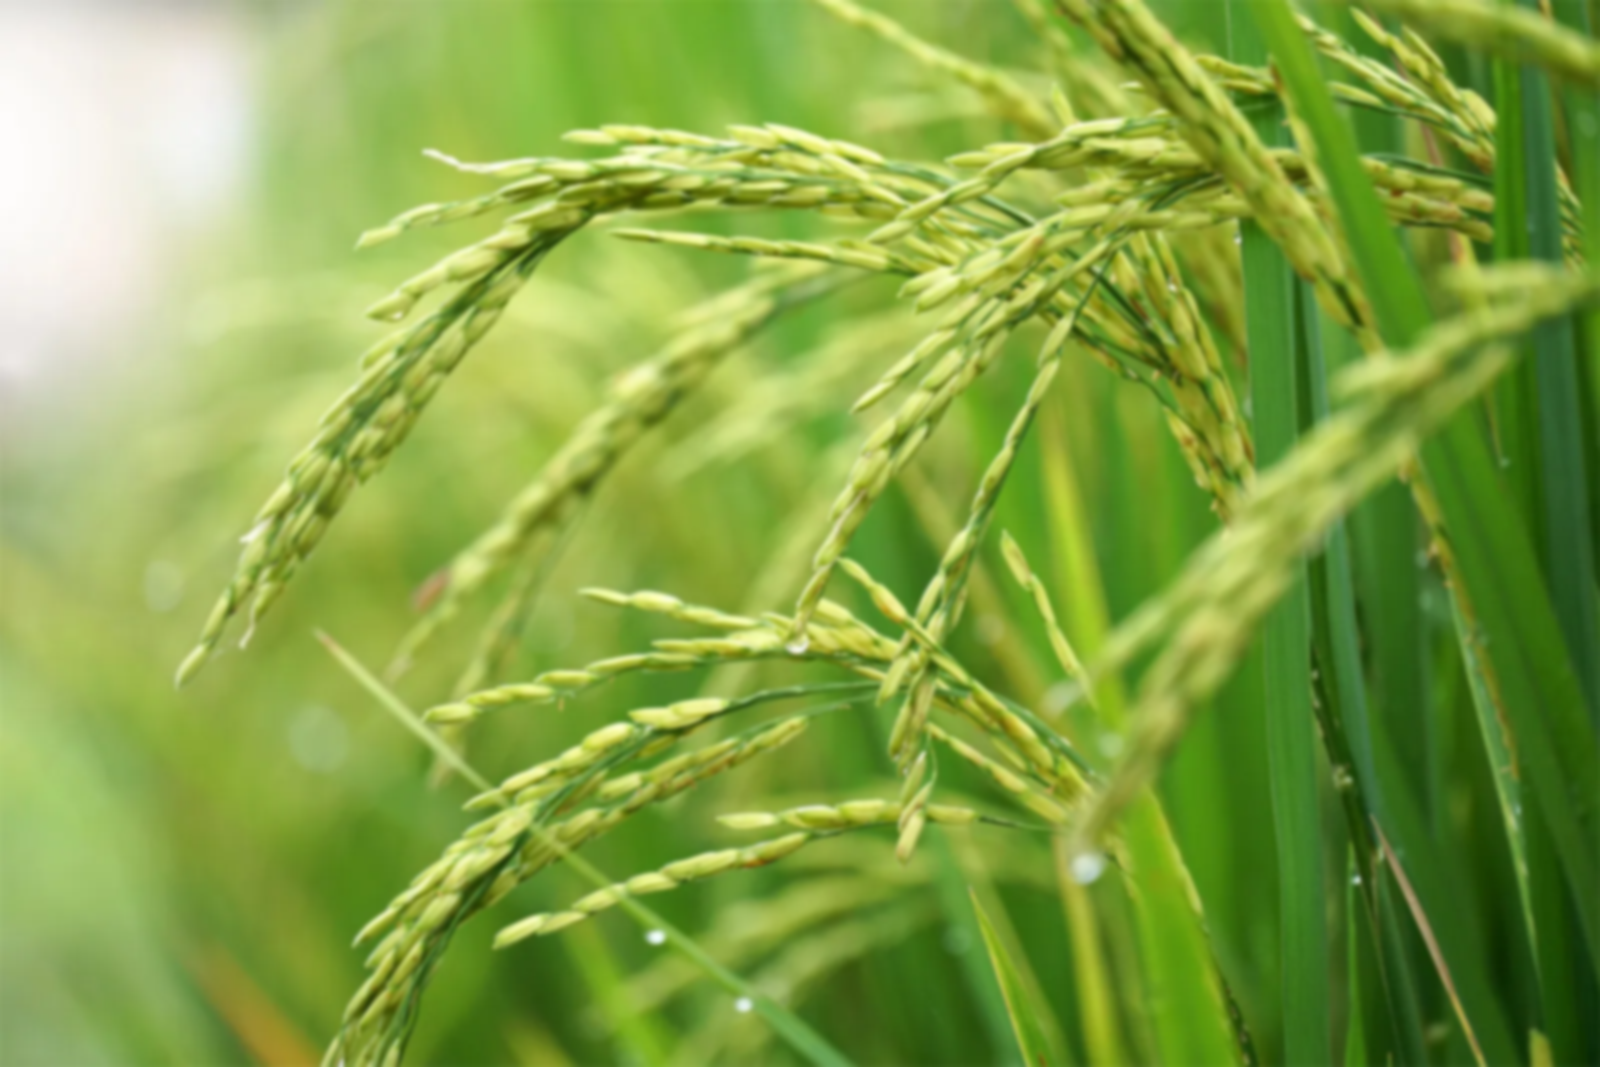
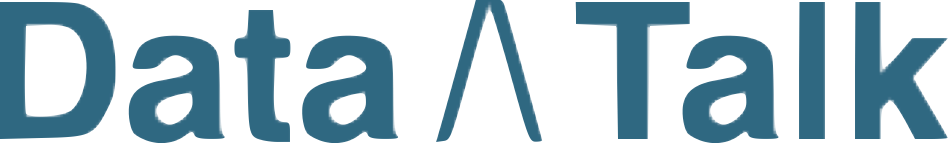
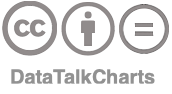

In [ ]:
im1 = Image.open('output2.png')

#making dual axis and defining categories
fig = make_subplots(specs=[[{'secondary_y':True}]])
category_1= 'plant area(ha)'
category_2 = 'Harvest quantity(t)'

# create first plot
fig.add_trace(
    go.Scatter(
        x= df_rice_new['Year'],
        y= df_rice_new['plant area(ha)'],
        name='Area harvested (ha)',
        marker_color='green',
        opacity=1),
        secondary_y =False,  
)

# creating the second plot
fig.add_trace(
    go.Bar(
        x= df_rice_new['Year'],
        y= df_rice_new['Harvest quantity(t)'],
        name='Production volume(ton)',
        marker_color='orange',
        opacity=0.7),
        secondary_y =True,
)

# configue title and chart layout
fig.update_layout(font_size=15,title={'text':'Rice production volume (tons) and harvest area (ha) in Japan (1883-2020)','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},yaxis={'categoryorder':'total ascending',},paper_bgcolor='rgb(248,248,255)',
    plot_bgcolor='rgb(248,248,255)', legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),)

## Add image as background image
fig.add_layout_image(
    dict(source= im1,
            xref="paper",
            yref="paper",
            x=-0.5,
            y=2,
            sizex=5,
            sizey=5,
            # sizing="stretch",
            opacity=0.2,
         #layer ='below'
            )
)

# Add logo image
fig.add_layout_image(
    dict(
        source=img_logo,
        xref="paper", yref="paper",
        x=0.05, y=1.2,
        sizex=0.1, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

# Add CC image
fig.add_layout_image(
    dict(
        source=img_cc,
        xref="paper", yref="paper",
        x=0.0, y=-0.24,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
    )
)

## Add data source
fig.add_annotation(text="Source: e-Stat https://www.e-stat.go.jp",
                  xref="paper", yref="paper",
                  x=0, y=0, showarrow=False,font=dict(family='Arial', size=12,
                                      color='rgb(150, 150, 150)'))

fig.update_xaxes(tickangle=90, tickfont=dict(family='Rockwell', color='gray', size=12))
# styling axis lines
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', 
                #  title_text='(ton)',
                 secondary_y=True,color='orange')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', 
                #  title_text='(ha)',
                 secondary_y=False,color='green')
fig.show()

In [ ]:
df_export1 = pd.read_excel('k002c-002-007-000-000.xls')
df_export1

,財務省貿易統計（輸出）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,農産品,NaN,NaN,NaN,NaN,NaN
1,米,NaN,NaN,NaN,NaN,NaN
2,世界,NaN,NaN,NaN,NaN,NaN
3,年次,米,NaN,NaN,NaN,NaN
4,NaN,第一単位,第一数量,第二単位,第二数量,金額（千円）
5,平.元(1989),NaN,0,MT,17,16739
6,平.2(1990),NaN,0,MT,16,14409
7,平.3(1991),NaN,0,MT,17,21018
8,平.4(1992),NaN,0,MT,49,32359
9,平.5(1993),NaN,0,MT,49,32732


In [ ]:
df_export2 = pd.read_excel('k002-2021-00-b013.xls')
df_export2.head(30)

WARNING *** file size (32876) not 512 + multiple of sector size (512)


,報告書名：農林水産物品目別実績（輸出）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,年次：令.３（２０２１）,NaN,NaN,NaN,NaN,NaN
1,月次：年計,NaN,NaN,NaN,NaN,NaN
2,米,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,国 名,米,NaN,NaN,NaN,NaN
6,NaN,第一単位,第一数量,第二単位,第二数量,金額（千円）
7,世界,NaN,0,MT,43119,6952938
8,中華人民共和国,NaN,0,MT,575,219139
9,台湾,NaN,0,MT,1907,574645


In [ ]:
df_pdf= pd.read_csv('kome_yusyutu-43.csv')
df_pdf

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,商業用の米の輸出数量等の推移,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,2017年,NaN,NaN,2018年,NaN,2019年,NaN,2020年,NaN,2021年,NaN,2022年\n(1~8月),NaN
1,NaN,数量,NaN,金額,数量,金額,数量,金額,数量,金額,数量,金額,数量,金額
2,NaN,NaN,トン,百万円,トン,百万円,トン,百万円,トン,百万円,トン,百万円,トン,百万円
3,輸出合計,"11,841\n(+19%)",NaN,"3,198\n(+18%)","13,794\n(+16%)","3,756\n(+17%)","17,381\n(+26%)","4,620\n(+23%)","19,781\n(+14%)","5,315\n(+15%)","22,833\n(+15%)","5,933\n(+12%)","17,639\n(+26%)","4,433\n(+22%)"
4,香港,"4,128",NaN,"1,016","4,690","1,160","5,436","1,372","6,978","1,796","8,938","2,118","6,301\n(+12%)","1,452\n(+7%)"
5,シンガポール,"2,861",NaN,642,"3,161",694,"3,879",802,"3,696",785,"4,972","1,025","3,652\n(+15%)",755\n(+15%)
6,アメリカ,986,NaN,320,"1,282",404,"1,980",543,"1,989",565,"2,244",625,"2,420\n(+68%)",639\n(+61%)
7,台湾,943,NaN,350,"1,173",394,"1,262",411,"2,004",622,"1,907",575,"1,529\n(+52%)",432\n(+36%)
8,オーストラリア,476,NaN,145,635,197,770,233,"1,074",334,893,283,703\n(+38%),218\n(+35%)
9,中国,298,NaN,97,524,211,"1,007",363,"1,002",321,575,219,442\n(+87%),144\n(+49%)


In [ ]:
df_process= df_pdf.iloc[:26]
df_process

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,商業用の米の輸出数量等の推移,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,2017年,NaN,NaN,2018年,NaN,2019年,NaN,2020年,NaN,2021年,NaN,2022年\n(1~8月),NaN
1,NaN,数量,NaN,金額,数量,金額,数量,金額,数量,金額,数量,金額,数量,金額
2,NaN,NaN,トン,百万円,トン,百万円,トン,百万円,トン,百万円,トン,百万円,トン,百万円
3,輸出合計,"11,841\n(+19%)",NaN,"3,198\n(+18%)","13,794\n(+16%)","3,756\n(+17%)","17,381\n(+26%)","4,620\n(+23%)","19,781\n(+14%)","5,315\n(+15%)","22,833\n(+15%)","5,933\n(+12%)","17,639\n(+26%)","4,433\n(+22%)"
4,香港,"4,128",NaN,"1,016","4,690","1,160","5,436","1,372","6,978","1,796","8,938","2,118","6,301\n(+12%)","1,452\n(+7%)"
5,シンガポール,"2,861",NaN,642,"3,161",694,"3,879",802,"3,696",785,"4,972","1,025","3,652\n(+15%)",755\n(+15%)
6,アメリカ,986,NaN,320,"1,282",404,"1,980",543,"1,989",565,"2,244",625,"2,420\n(+68%)",639\n(+61%)
7,台湾,943,NaN,350,"1,173",394,"1,262",411,"2,004",622,"1,907",575,"1,529\n(+52%)",432\n(+36%)
8,オーストラリア,476,NaN,145,635,197,770,233,"1,074",334,893,283,703\n(+38%),218\n(+35%)
9,中国,298,NaN,97,524,211,"1,007",363,"1,002",321,575,219,442\n(+87%),144\n(+49%)


In [ ]:
df_final = df_process[['Unnamed: 0','Unnamed: 1','商業用の米の輸出数量等の推移','Unnamed: 6','Unnamed: 8','Unnamed: 10','Unnamed: 12']].iloc[4:].rename({'Unnamed: 0':'country','Unnamed: 1':'2017','商業用の米の輸出数量等の推移':'2018','Unnamed: 6':'2019','Unnamed: 8':'2020','Unnamed: 10':'2021','Unnamed: 12':'2022till Aug' },axis=1)
 
df_final['2022till Aug']=df_final['2022till Aug'].str.split('\n',n=1,expand=True,)[0]
df_final

df_clean1 = df_final.replace('※','0',regex=True)
df_clean2 = df_clean1.replace(',','',regex=True)

for x in df_clean2.columns[1:]:
  df_clean2[x] =df_clean2[x].astype('float')
 
df_clean2.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 4 to 25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       22 non-null     object 
 1   2017          21 non-null     float64
 2   2018          22 non-null     float64
 3   2019          22 non-null     float64
 4   2020          22 non-null     float64
 5   2021          22 non-null     float64
 6   2022till Aug  22 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.3+ KB


In [ ]:
df_clean2['2022'] =df_clean2['2022till Aug'] *12/8
df_clean2

,country,2017,2018,2019,2020,2021,2022till Aug,2022
4,香港,4128.0,4690.0,5436.0,6978.0,8938.0,6301.0,9451.5
5,シンガポール,2861.0,3161.0,3879.0,3696.0,4972.0,3652.0,5478.0
6,アメリカ,986.0,1282.0,1980.0,1989.0,2244.0,2420.0,3630.0
7,台湾,943.0,1173.0,1262.0,2004.0,1907.0,1529.0,2293.5
8,オーストラリア,476.0,635.0,770.0,1074.0,893.0,703.0,1054.5
9,中国,298.0,524.0,1007.0,1002.0,575.0,442.0,663.0
10,タイ,192.0,320.0,578.0,555.0,625.0,628.0,942.0
11,イギリス,695.0,422.0,450.0,451.0,332.0,340.0,510.0
12,ロシア,78.0,120.0,174.0,199.0,227.0,96.0,144.0
13,フランス,61.0,78.0,93.0,112.0,173.0,135.0,202.5


https://stackoverflow.com/questions/21752399/pandas-dataframe-total-row

In [ ]:
df_clean2.loc['Total']= df_clean2.iloc[:-2].sum(axis=0,numeric_only=True)
df_clean2

,country,2017,2018,2019,2020,2021,2022till Aug,2022
4,香港,4128.0,4690.0,5436.0,6978.0,8938.0,6301.0,9451.5
5,シンガポール,2861.0,3161.0,3879.0,3696.0,4972.0,3652.0,5478.0
6,アメリカ,986.0,1282.0,1980.0,1989.0,2244.0,2420.0,3630.0
7,台湾,943.0,1173.0,1262.0,2004.0,1907.0,1529.0,2293.5
8,オーストラリア,476.0,635.0,770.0,1074.0,893.0,703.0,1054.5
9,中国,298.0,524.0,1007.0,1002.0,575.0,442.0,663.0
10,タイ,192.0,320.0,578.0,555.0,625.0,628.0,942.0
11,イギリス,695.0,422.0,450.0,451.0,332.0,340.0,510.0
12,ロシア,78.0,120.0,174.0,199.0,227.0,96.0,144.0
13,フランス,61.0,78.0,93.0,112.0,173.0,135.0,202.5


In [ ]:
df_real_final = df_clean2.iloc[:-2]
df_real_final 

,country,2017,2018,2019,2020,2021,2022till Aug,2022
4,香港,4128.0,4690.0,5436.0,6978.0,8938.0,6301.0,9451.5
5,シンガポール,2861.0,3161.0,3879.0,3696.0,4972.0,3652.0,5478.0
6,アメリカ,986.0,1282.0,1980.0,1989.0,2244.0,2420.0,3630.0
7,台湾,943.0,1173.0,1262.0,2004.0,1907.0,1529.0,2293.5
8,オーストラリア,476.0,635.0,770.0,1074.0,893.0,703.0,1054.5
9,中国,298.0,524.0,1007.0,1002.0,575.0,442.0,663.0
10,タイ,192.0,320.0,578.0,555.0,625.0,628.0,942.0
11,イギリス,695.0,422.0,450.0,451.0,332.0,340.0,510.0
12,ロシア,78.0,120.0,174.0,199.0,227.0,96.0,144.0
13,フランス,61.0,78.0,93.0,112.0,173.0,135.0,202.5


In [ ]:
df_final_final=pd.melt(df_real_final, id_vars =['country'], value_vars =['2017', '2018', '2019', '2020', '2021',
       '2022'])
df_final_final

,country,variable,value
0,香港,2017,4128.0
1,シンガポール,2017,2861.0
2,アメリカ,2017,986.0
3,台湾,2017,943.0
4,オーストラリア,2017,476.0
...,...,...,...
121,アラブ首長国連邦,2022,108.0
122,マレーシア,2022,235.5
123,オランダ,2022,93.0
124,モンゴル,2022,237.0


https://www.gov-online.go.jp/eng/publicity/book/hlj/html/202011/202011_09_en.html

In [ ]:
# Open the image from local path
img = Image.open('rice.jpg')
img_logo = Image.open('logo_dataTalk.png')
img_cc = Image.open('ccsign.png')

## Create animated bar chart
fig = px.bar(df_final_final, x='value',y='country',orientation='h',animation_frame='variable',animation_group='country',color='country',labels={'country':'Countries','value':'Quantities'})
 
fig.update_yaxes(title=None)
fig.update_xaxes(title=None)

## Add image as background image
fig.add_layout_image(
    dict(source= img,
            xref="paper",
            yref="paper",
            x=-0.5,
            y=2,
            sizex=6,
            sizey=6,
            #sizing="stretch",
            opacity=0.2,
         #layer ='below'
            )
)

# Add logo image
fig.add_layout_image(
    dict(
        source=img_logo,
        xref="paper", yref="paper",
        x=0.01, y=-0.475,
        sizex=0.1, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

# Add CC image
fig.add_layout_image(
    dict(
        source=img_cc,
        xref="paper", yref="paper",
        x=-0.1, y=-0.52,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
    )
)


## Add data source
fig.add_annotation(text="Source: FAOSAT https://www.fao.org/faostat",
                  xref="paper", yref="paper",
                  x=1.01, y=-0.30, showarrow=False,font=dict(family='Arial', size=12,
                                      color='rgb(150, 150, 150)'))
## Hide legend 
fig.update(layout_showlegend=False)

## update layout properties: Add title of the chart
fig.update_layout(font_size=10,title={'text':'Japanese rice export top destination(tons)','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},yaxis={'categoryorder':'total ascending'},paper_bgcolor='rgb(248,248,255)',
    plot_bgcolor='rgb(248,248,255)')

fig.show()

# save as html
fig.write_html('topRice.html')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
px.line(df_final_final, x='variable',y='value',color='country')

https://plotly.com/python/pie-charts/

In [ ]:
# create pie chart
fig=px.pie(df_real_final, values='2021',names='country',color='country', )
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
import plotly.graph_objects as go
# Use `hole` to create a donut-like pie chart

fig = go.Figure(data=[go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2021'], hole=.4,
                            #  pull=[0,0,0.2,0]
                             )])
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, 
                  # uniformtext_mode='hide'
                  )

fig.update_layout(
    # title_text="Japan rice export in 2021",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Rice export', x=0.5, y=0.55, font_size=20, showarrow=False),
                 dict(text='Japan 2021', x=0.5, y=0.45, font_size=20, showarrow=False)])

## update layout properties: Add title of the chart
# fig.update_layout(font_size=10,title={'text':'Japanese rice export top destination(tons)','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},yaxis={'categoryorder':'total ascending'},paper_bgcolor='rgb(248,248,255)',
#     plot_bgcolor='rgb(248,248,255)')

## Hide legend 
fig.update(layout_showlegend=False)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, 
                  # uniformtext_mode='hide'
                  )

# customise color of pie chart
colors = ['#FFE6E6', '#F2D1D1', '#DAEAF1', '#C6DCE4','#93B5C6','#C9CCD5','#E4D8DC','#FFE3E3','#FDEFEF',
          '#F4DFD0','#DAD0C2','#DAD0C2','#F8F9D7','#C4D7E0','#B2C8DF','#6E85B7','#C6DCE4','#DAEAF1','#F2D1D1','#FFE6E6','#CDBBA7']
fig.update_traces(hoverinfo='label+percent', 
                  # textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0)))

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(2,3, specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'},  {'type':'domain'}]],
                    subplot_titles=['2017','2018','2019','2020', '2021','2022'])

fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2017'], 
                    #  hole=.4, 
                     name='2017',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),1,1)

fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2018'], 
                    #  hole=.4, 
                     name='2018',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),1,2)
fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2019'], 
                    #  hole=.4, 
                     name='2019',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),1,3)
fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2020'], 
                    #  hole=.4, 
                     name='2020',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),2,1)
fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2021'], 
                    #  hole=.4,
                     name='2021',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),2,2)
fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent',values=df_real_final['2022'], 
                    #  hole=.4,
                     name='2022',scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),2,3)


# fig.add_trace(go.Pie(labels=labels, values=[4, 7, 1, 7, 0.5], scalegroup='one',
#                      name="World GDP 1980"), 1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[21, 15, 3, 19, 1], scalegroup='one',
#                      name="World GDP 2007"), 1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, 
                  # uniformtext_mode='hide'
                  )

fig.update_layout(title_text='Japan Rice Export ')
## Hide legend 
fig.update(layout_showlegend=False)

fig.show()

https://plotly.com/python/subplots/

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['2017', '2021'])

fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent+value',values=df_real_final['2017'], 
                    #  hole=.4, 
                     name='2017', scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),1,1)

fig.add_trace(go.Pie(labels=df_real_final['country'], textinfo='label+percent+value',values=df_real_final['2021'], 
                    #  hole=.4, 
                     name='2021', scalegroup='one',
                            #  pull=[0,0,0.2,0]
                             ),1,2)

# fig.add_trace(go.Pie(labels=labels, values=[4, 7, 1, 7, 0.5], scalegroup='one',
#                      name="World GDP 1980"), 1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[21, 15, 3, 19, 1], scalegroup='one',
#                      name="World GDP 2007"), 1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, 
                  # uniformtext_mode='hide'
                  )

fig.update_layout(title_text='Rice export Japan')
## Hide legend 
fig.update(layout_showlegend=False)

# customise color of pie chart
colors = ['#FFE6E6', '#F2D1D1', '#DAEAF1', '#C6DCE4','#93B5C6','#C9CCD5','#E4D8DC','#FFE3E3','#FDEFEF',
          '#F4DFD0','#DAD0C2','#DAD0C2','#F8F9D7','#C4D7E0','#B2C8DF','#6E85B7','#C6DCE4','#DAEAF1','#F2D1D1','#FFE6E6','#CDBBA7']
# colors = ['peachpuff', 'tomato', 'steelblue', 'thistle','lightpink','linen','lightcyan','lightseagreen','lightblue','indianred','gold']
fig.update_traces(hoverinfo='label+percent', 
                  # textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=0)))

# update layout properties: Add title of the chart
fig.update_layout(font_size=15,title={'text':'Japanese rice export destinations(tons)','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},yaxis={'categoryorder':'total ascending'},paper_bgcolor='rgb(248,248,255)',
    plot_bgcolor='rgb(248,248,255)')

fig.show()

In [ ]:
 df_chart = df_real_final[['country','2017','2021']]
 df_chart

,country,2017,2021
4,香港,4128.0,8938.0
5,シンガポール,2861.0,4972.0
6,アメリカ,986.0,2244.0
7,台湾,943.0,1907.0
8,オーストラリア,476.0,893.0
9,中国,298.0,575.0
10,タイ,192.0,625.0
11,イギリス,695.0,332.0
12,ロシア,78.0,227.0
13,フランス,61.0,173.0


https://plotly.com/python/setting-graph-size/

https://plotly.com/python/reference/#treemap-textinfo

https://stackoverflow.com/questions/60575662/how-to-update-plotly-express-treemap-to-have-both-label-as-well-as-the-value-ins



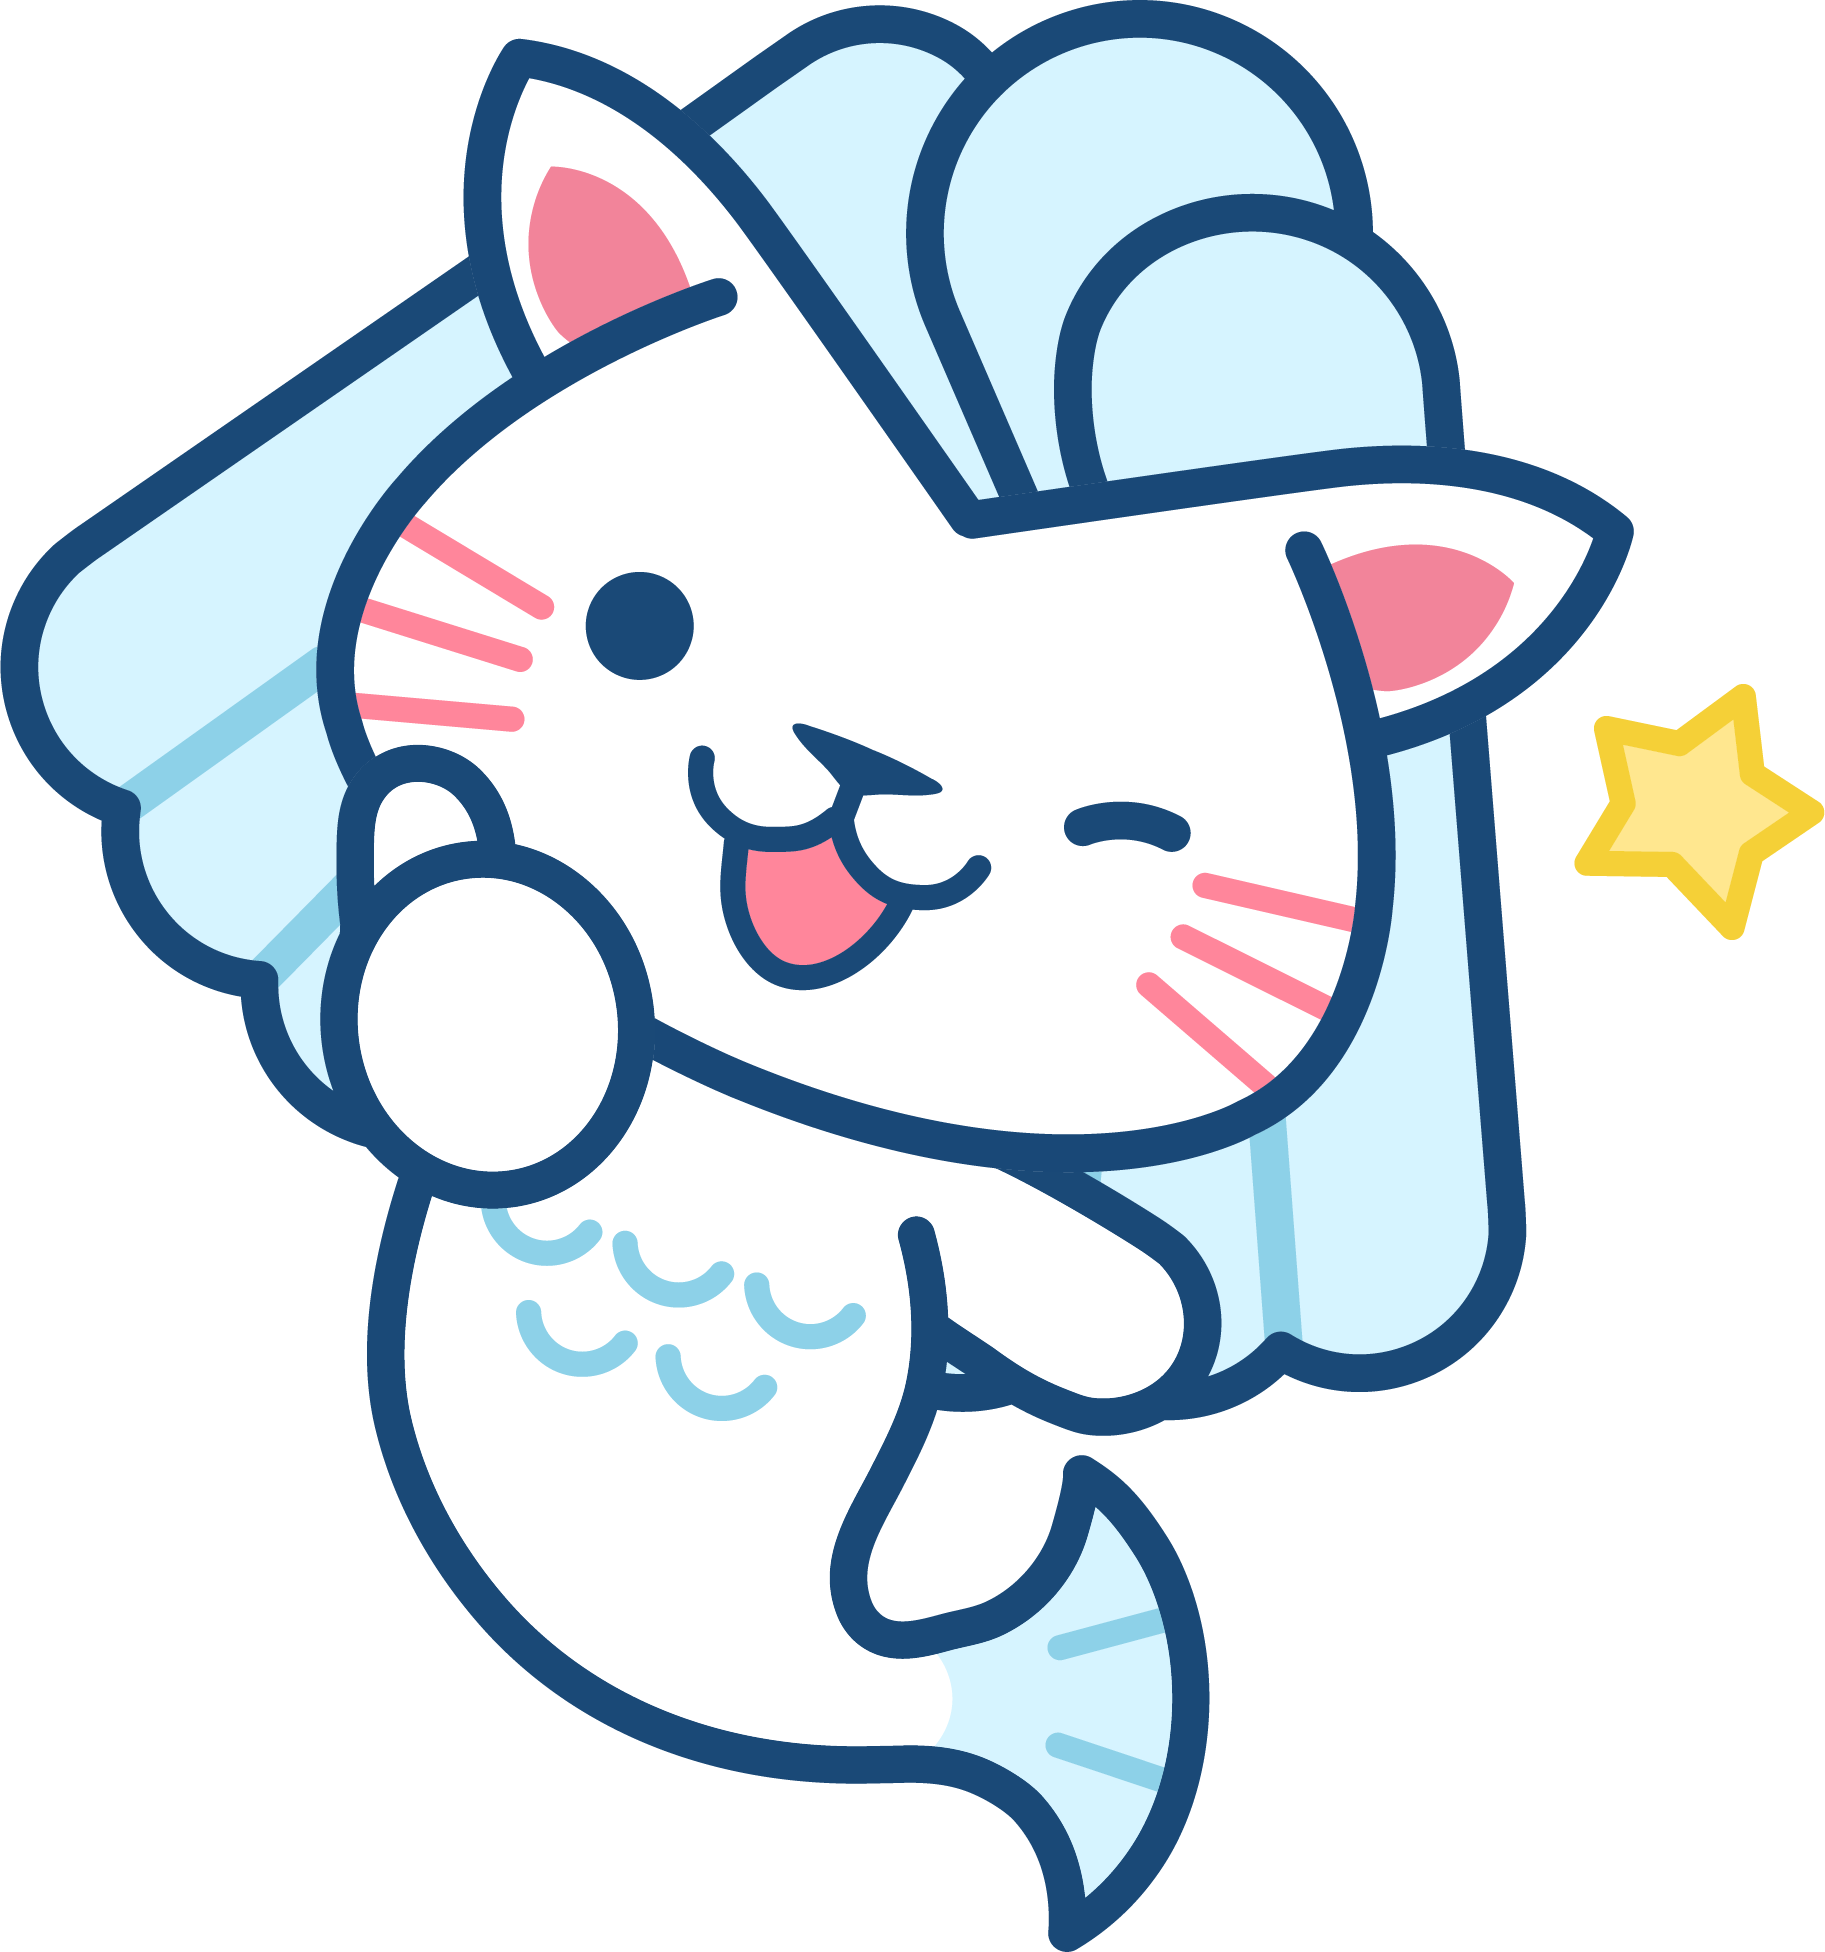
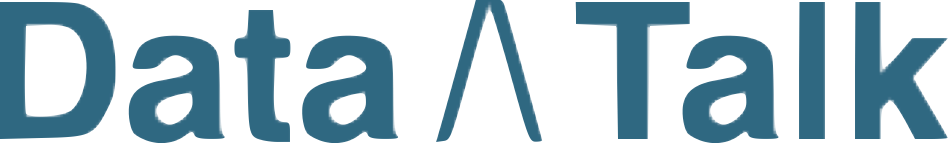
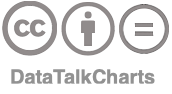

In [ ]:
img_log = Image.open('merlion.png')

fig = px.treemap(df_chart, path=['country'], values= '2021',
                  color='country',width=600,height=600, )

# # add margins to the graph
# fig.update_layout(
#     margin=dict(l=10, r=10, t=0, b=10),
#     paper_bgcolor="#F2D1D1", 
# )

fig.data[0].textinfo = 'label+text+value'

# fig.layout.hovermode = False
fig.update_layout(font_size=13,title={'text':'Japan rice export destinations in 2021(tons)','y':0.95,'x':0.5, })

# Add logo image
fig.add_layout_image(
    dict(
        source=img_log,
        xref="paper", yref="paper",
        x=0.93, y=0.5,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="bottom"
    )
)
## Add data source
fig.add_annotation(text="Source: e-Stat https://www.e-stat.go.jp",
                  xref="paper", yref="paper",
                  x=0.01, y=1, showarrow=False,font=dict(family='Arial', size=12,
                                      color='rgb(150, 150, 150)'))

# Add logo image
fig.add_layout_image(
    dict(
        source=img_logo,
        xref="paper", yref="paper",
        x=0.98, y=0.97,
        sizex=0.1, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

# Add CC image
fig.add_layout_image(
    dict(
        source=img_cc,
        xref="paper", yref="paper",
        x=0.14, y=0.015,
        sizex=0.12, sizey=0.12,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

In [ ]:
df_country = pd.read_csv('country_name.csv')
df_country

,Unnamed: 0,Kanji,Hiragana orKatakana,Romaji,Country / Region
0,NaN,Kanji,Hiragana orKatakana,Romaji,Country / Region
1,i,国,くに,kuni,Country
2,ii,大陸,たいりく,tairiku,Continent
3,iii,NaN,アフリカ,afurika,Africa
4,iv,南極大陸,なんきょくたいりく,nankyoku tairiku,Antarctica
...,...,...,...,...,...
164,153.,NaN,ウェールズ,we- ru zu,Wales
165,154.,NaN,イエメン,i e men,Yemen
166,155.,コンゴ民主共和国,コンゴみんしゅうきょうわこく,kongo minshu kyouwa koku,Democratic Republic of the Congo
167,156.,NaN,ザンビア,zan bi a,Zambia


https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

In [ ]:
df_process=df_country[['Kanji', 'Hiragana orKatakana',
       'Country / Region']].iloc[1:]
df_process['Kanji'] =df_process['Kanji'].fillna(df_process['Hiragana orKatakana'])
df_final= df_process.rename({'Kanji':'country'},axis=1)
df_final

 

,country,Hiragana orKatakana,Country / Region
1,国,くに,Country
2,大陸,たいりく,Continent
3,アフリカ,アフリカ,Africa
4,南極大陸,なんきょくたいりく,Antarctica
5,アジア,アジア,Asia
...,...,...,...
164,ウェールズ,ウェールズ,Wales
165,イエメン,イエメン,Yemen
166,コンゴ民主共和国,コンゴみんしゅうきょうわこく,Democratic Republic of the Congo
167,ザンビア,ザンビア,Zambia


In [ ]:
# change the name of the columns
df_country =df_final.rename({'country':'JP','Hiragana orKatakana':'jp','Country / Region':'EN'},axis=1)[['JP','jp','EN']]
# save the df to csv file
df_country.to_csv('countryname.csv')

In [ ]:
# merge two dataframe to incorporate english name
df_en =pd.merge(df_final,df_chart, on='country')
df_en

,country,Hiragana orKatakana,Country / Region,2017,2021
0,アメリカ,アメリカ,America (USA),986.0,2244.0
1,オーストラリア,オーストラリア,Australia,476.0,893.0
2,カナダ,カナダ,Canada,92.0,210.0
3,中国,ちゅうごく,China,298.0,575.0
4,フィンランド,フィンランド,Finland,NaN,216.0
5,フランス,フランス,France,61.0,173.0
6,ドイツ,ドイツ,Germany,62.0,185.0
7,イギリス,イギリス,Great Britain,695.0,332.0
8,オランダ,オランダ,Holland / The Netherlands,105.0,92.0
9,香港,ほんこん,Hong Kong,4128.0,8938.0



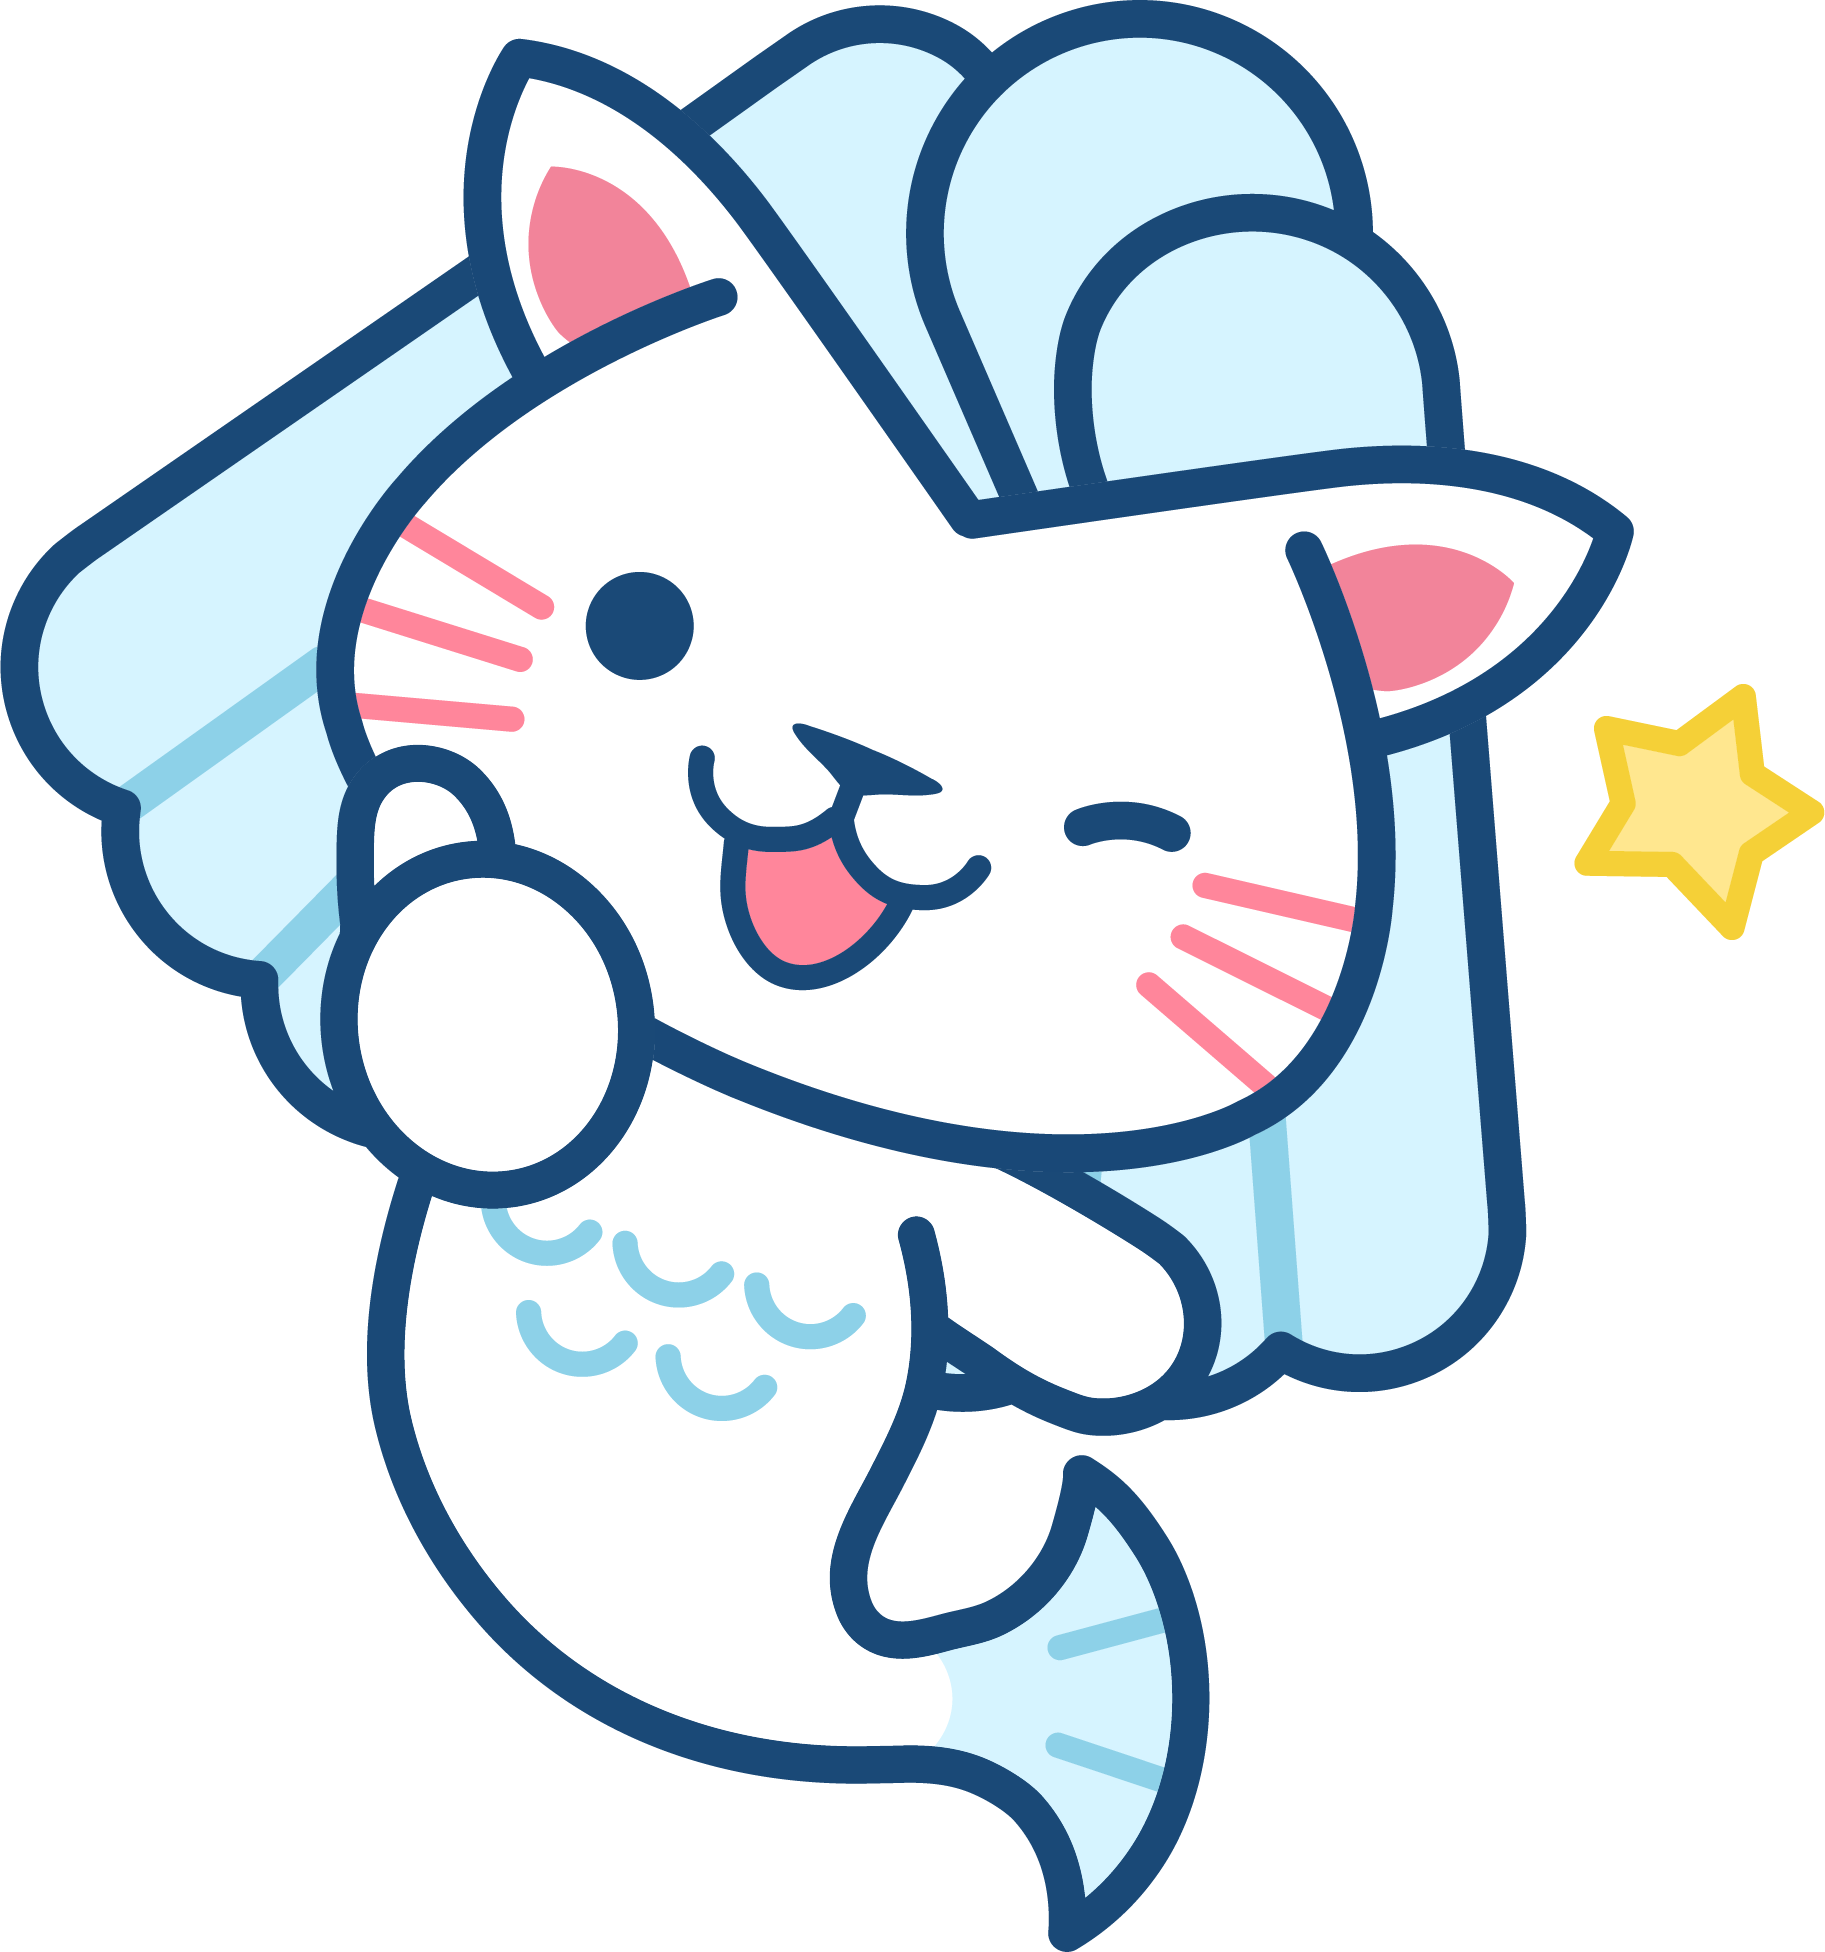
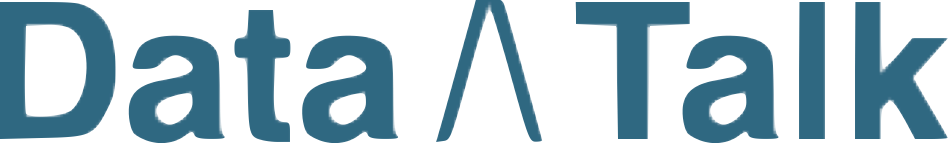
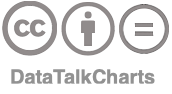

In [ ]:
img_log = Image.open('merlion.png')

fig = px.treemap(df_en, path=['Country / Region'], values= '2021',
                  color='Country / Region',width=600,height=600, )


fig.data[0].textinfo = 'label+text+value'

# fig.layout.hovermode = False
fig.update_layout(font_size=13,title={'text':'Japan rice export destinations in 2021(tons)','y':0.95,'x':0.5, })

# Add logo image
fig.add_layout_image(
    dict(
        source=img_log,
        xref="paper", yref="paper",
        x=0.95, y=0.5,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"
    )
)
## Add data source
fig.add_annotation(text="Source: e-Stat https://www.e-stat.go.jp",
                  xref="paper", yref="paper",
                  x=0.01, y=0.99, showarrow=False,font=dict(family='Arial', size=12,
                                      color='rgb(150, 150, 150)'))

# Add logo image
fig.add_layout_image(
    dict(
        source=img_logo,
        xref="paper", yref="paper",
        x=0.98, y=0.95,
        sizex=0.1, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)

# Add CC image
fig.add_layout_image(
    dict(
        source=img_cc,
        xref="paper", yref="paper",
        x=0.14, y=0.015,
        sizex=0.11, sizey=0.11,
        xanchor="right", yanchor="bottom"
    )
)
fig.show()

In [ ]:
df_de = pd.read_csv('DE_name.csv')

df_DE=df_de[['ENGLISH', 'DEUTSCH',
       ]].iloc[1:]
 
df_Detsch = df_DE.rename({'ENGLISH':'EN', 'DEUTSCH':'DE',},axis=1)
df_Detsch

,EN,DE
1,Afghanistan,Afghanistan
2,Albania,Albanien
3,Algeria,Algerien
4,Argentina,Argentinien
5,Armenia,Armenien
...,...,...
93,Venezuela,Venezuela
94,White Russia(Belarus),WeißrusslandBelarus
95,Yemen,Jemen m.
96,Zambia,Sambia


In [ ]:
# merge two dataframe to incorporate english name
df_co =pd.merge(df_country,df_Detsch, on='EN')
df_co.to_csv('df_co.csv')
df_co

,JP,jp,EN,DE
0,アフガニスタン,アフガニスタン,Afghanistan,Afghanistan
1,アルバニア,アルバニア,Albania,Albanien
2,アルジェリア,アルジェリア,Algeria,Algerien
3,アルゼンチン,アルゼンチン,Argentina,Argentinien
4,オーストラリア,オーストラリア,Australia,Australien
...,...,...,...,...
76,アラブ首長国連邦,アラブしゅちょうこくれんぽう,United Arab Emirates,Vereinigte Arabische Emirate pl.
77,ベネズエラ,ベネズエラ,Venezuela,Venezuela
78,イエメン,イエメン,Yemen,Jemen m.
79,ザンビア,ザンビア,Zambia,Sambia


In [ ]:
# add missing items to the dataframe

dict={'JP':['香港','台湾','マカオ'],
      'jp':['ほんこん','たいわん','マカオ'],
      'EN':['Hong Kong','Taiwan','Macau'],
      'DE':['Hongkong','Taiwan','Macau']
      }

# df_co = df_co.append(dict, ignore_index=True). # for one row

df2= pd.DataFrame(dict)  # for multiple rows
df_co3 = pd.concat([df_co,df2],ignore_index=True)
df_co3
# df_co3.reset_index()

# save dataframe to csv format
df_co3.to_csv('countrynm1.csv')